# DMPS data: 

In [103]:
import dominics_functions as fu

import glob
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


"""[YYYY, MM, DD, HH, mm, UF(?)CPC, CPC3010, N_int, bin1:end, numflag]. Sizes in m and dN/dlogdp in cm-3. This data is level 2."""    

In [104]:
datetime_cols = ['YYYY', 'MM', 'DD', 'HH', 'mm']
unknowns = ['UFCPC','CPC3030', 'N_int', 'unknown4', 'unknown5',
            'unknown6','unknown7', 'unknown8']
bin_col_names_2010_2020 = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
       '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
       '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
       '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
       '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
       '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
       '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
       '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
       '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
       '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
       '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
       '7.0794578e-07']

bin_col_names_floats = [float(i)*10**9 for i in bin_col_names_2010_2020]

bin_cols = np.around(bin_col_names_floats, decimals=3)
bin_cols = np.asarray(bin_cols) 
bin_cols = [str(x) for x in bin_cols]

flag = ['numflag']
all_cols = datetime_cols + unknowns + bin_cols + flag
print(all_cols)

['YYYY', 'MM', 'DD', 'HH', 'mm', 'UFCPC', 'CPC3030', 'N_int', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.012', '5.623', '6.31', '7.079', '7.943', '8.913', '10.0', '11.22', '12.589', '14.125', '15.849', '17.783', '19.953', '22.387', '25.119', '28.184', '31.623', '35.481', '39.811', '44.668', '50.119', '56.234', '63.096', '70.795', '79.433', '89.125', '100.0', '112.202', '125.893', '141.254', '158.489', '177.828', '199.526', '223.872', '251.189', '281.838', '316.228', '354.813', '398.107', '446.684', '501.187', '562.341', '630.957', '707.946', 'numflag']


In [105]:
def append_2010_2020(inpath, name_in_file, all_cols, datetime_cols=['YYYY', 'MM', 'DD', 'HH', 'mm']):
    DFs = []
    folder = glob.glob(inpath+str(name_in_file)+'*.dat')
    folder.sort()
    for file in folder: 
        print(file)
        ds = pd.read_csv(file, sep='\s+', 
                         skiprows=1, names=all_cols)   
        ds[datetime_cols] = ds[datetime_cols].astype(int)
        ds['DateTime'] = ds[datetime_cols].apply(lambda s : datetime.datetime(*s),axis = 1)
        ds = ds.drop(datetime_cols, axis=1)
        ds = ds.set_index('DateTime')        
        print("Size without flags removed: "+str(len(ds)))
        ds = ds[ds.loc[:,'numflag'] != 0.999] #remove these
        DFs.append(ds)
    return DFs

In [106]:
DFs_2010_2020 = append_2010_2020('C:\\Users\\DominicHeslinRees\\Documents\\Data\\DMPS_ZEP\\DATA_ZEP_2010to2020\\', 
                             name_in_file='DMPS', all_cols=all_cols)

C:\Users\DominicHeslinRees\Documents\Data\DMPS_ZEP\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat
Size without flags removed: 17520
C:\Users\DominicHeslinRees\Documents\Data\DMPS_ZEP\DATA_ZEP_2010to2020\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat
Size without flags removed: 17520
C:\Users\DominicHeslinRees\Documents\Data\DMPS_ZEP\DATA_ZEP_2010to2020\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat
Size without flags removed: 17568
C:\Users\DominicHeslinRees\Documents\Data\DMPS_ZEP\DATA_ZEP_2010to2020\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat
Size without flags removed: 17520
C:\Users\DominicHeslinRees\Documents\Data\DMPS_ZEP\DATA_ZEP_2010to2020\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat
Size without flags removed: 17520
C:\Users\DominicHeslinRees\Documents\Data\DMPS_ZEP\DATA_ZEP_2010to2020\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat
Size without flags removed: 17520
C:\Users\DominicHeslinRees\Documents\Data\DMPS

In [128]:
def concat_df_2010_2020(df_list):    
    appended_data = []
    for i in range(len(df_list)):         
        df = df_list[i]    
        appended_data.append(df)        
    appended_data = pd.concat(appended_data, sort=True)  
    appended_data = appended_data.reindex(unknowns + bin_cols + flag, axis=1)
    appended_data = appended_data.drop(columns=['unknown4', 'unknown5',
                                                'unknown6','unknown7', 'unknown8'])
    
    return appended_data

In [129]:
df_2010_2020 = concat_df_2010_2020(DFs_2010_2020)

In [131]:
df_2010_2020.head(2)

,UFCPC,CPC3030,N_int,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,numflag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:30:00,0.0,192.74387,243.84122,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.94957,12.333647,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,193.46634,215.13303,2.808381e-29,2.806194e-29,2.803731e-29,2.800955e-29,2.797826e-29,2.794297e-29,2.790318e-29,...,30.370227,16.315628,14.74994,7.853108,1.110854,0.012225,7.289623e-02,NaN,NaN,0.0


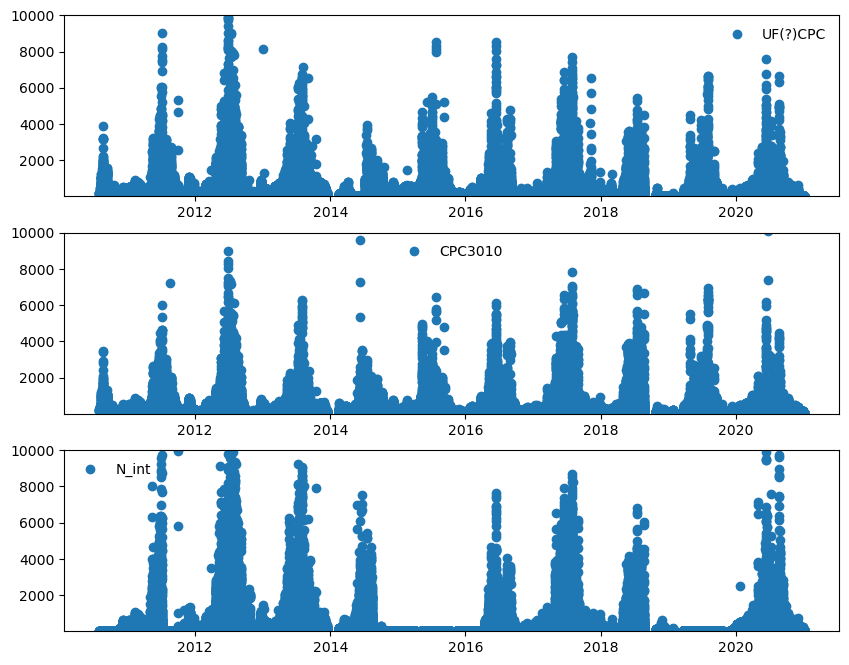

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8))

ax1.plot(df_2010_2020.index, df_2010_2020['CPC3030'].values, 'o', label='UF(?)CPC')
ax2.plot(df_2010_2020.index, df_2010_2020['N_int'].values, 'o', label='CPC3010')
ax3.plot(df_2010_2020.index, df_2010_2020['UFCPC'].values, 'o', label='N_int')

for ax in [ax1, ax2, ax3]:
    ax.legend(frameon=False)
    ax.set_ylim(1,10**4)
plt.show()

In [112]:
dict_years_to_df = {"2010_2020":df_2010_2020}

In [133]:
df_2010_2020.head(2)

,UFCPC,CPC3030,N_int,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,numflag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:30:00,0.0,192.74387,243.84122,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.94957,12.333647,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,193.46634,215.13303,2.808381e-29,2.806194e-29,2.803731e-29,2.800955e-29,2.797826e-29,2.794297e-29,2.790318e-29,...,30.370227,16.315628,14.74994,7.853108,1.110854,0.012225,7.289623e-02,NaN,NaN,0.0


In [137]:
df_2010_2020.columns

Index(['UFCPC', 'CPC3030', 'N_int', '5.012', '5.623', '6.31', '7.079', '7.943',
       '8.913', '10.0', '11.22', '12.589', '14.125', '15.849', '17.783',
       '19.953', '22.387', '25.119', '28.184', '31.623', '35.481', '39.811',
       '44.668', '50.119', '56.234', '63.096', '70.795', '79.433', '89.125',
       '100.0', '112.202', '125.893', '141.254', '158.489', '177.828',
       '199.526', '223.872', '251.189', '281.838', '316.228', '354.813',
       '398.107', '446.684', '501.187', '562.341', '630.957', '707.946',
       'numflag'],
      dtype='object')

# Clustering

In [138]:
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans

Have to normalise the size distributions first, by the maximum concentration so it goes from 0 to 1 for all size distributions

In [139]:
def create_normalised_df(df, start_size_bin_col='10', end_size_bin_col='89.125'):
    n_vars = ['norm'+str(df.loc[:, start_size_bin_col:end_size_bin_col].columns.tolist()[i]) for i in range(0, df.loc[:, start_size_bin_col:end_size_bin_col].shape[1])]
    print(n_vars)
    #divide by maximum
    df[n_vars] = df.loc[:, start_size_bin_col:end_size_bin_col].div(df.loc[:, start_size_bin_col:end_size_bin_col].max(axis=1), axis=0)
    
    df = df.loc[df.loc[:,start_size_bin_col:end_size_bin_col].dropna().index]
    
    Datetime_index = df.index    
    df.reset_index(drop=True, inplace=True)
    print("Size of df after removing np.nan: "+str(len(df)))        
    start_size_normbin_col = 'norm'+str(start_size_bin_col)
    end_size_normbin_col = 'norm'+str(end_size_bin_col)    
    
    df_norm = df.loc[:, start_size_normbin_col:end_size_normbin_col].copy()
    df_norm.index = Datetime_index
    df.index = Datetime_index
    print("Shape of df_norm: "+str(df_norm.shape))
    print("Shape of df: "+str(df.shape))
    return df, df_norm

In [140]:
df_2010_2020.head(2)

,UFCPC,CPC3030,N_int,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,numflag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:30:00,0.0,192.74387,243.84122,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.94957,12.333647,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,193.46634,215.13303,2.808381e-29,2.806194e-29,2.803731e-29,2.800955e-29,2.797826e-29,2.794297e-29,2.790318e-29,...,30.370227,16.315628,14.74994,7.853108,1.110854,0.012225,7.289623e-02,NaN,NaN,0.0


In [141]:
df_2010_2020.columns

Index(['UFCPC', 'CPC3030', 'N_int', '5.012', '5.623', '6.31', '7.079', '7.943',
       '8.913', '10.0', '11.22', '12.589', '14.125', '15.849', '17.783',
       '19.953', '22.387', '25.119', '28.184', '31.623', '35.481', '39.811',
       '44.668', '50.119', '56.234', '63.096', '70.795', '79.433', '89.125',
       '100.0', '112.202', '125.893', '141.254', '158.489', '177.828',
       '199.526', '223.872', '251.189', '281.838', '316.228', '354.813',
       '398.107', '446.684', '501.187', '562.341', '630.957', '707.946',
       'numflag'],
      dtype='object')

In [146]:
bin_cols[0]

'5.012'

In [147]:
df, df_norm = create_normalised_df(df_2010_2020, start_size_bin_col=bin_cols[0], end_size_bin_col=bin_cols[-1])

Size of df after removing np.nan: 64666
Shape of df_norm: (64666, 44)
Shape of df: (64666, 92)


In [148]:
df.head(2)

,UFCPC,CPC3030,N_int,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,norm251.189,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,norm630.957,norm707.946
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-10 14:00:00,0.0,104.23909,92.359702,2.544511e-29,2.542450e-29,2.540128e-29,2.537511e-29,2.534562e-29,2.531234e-29,2.527482e-29,...,1.000000,0.991352,0.644837,0.418756,0.221130,0.073787,0.014255,0.008561,0.011367,0.012960
2010-11-10 14:30:00,0.0,105.68348,103.202890,2.548815e-29,2.546754e-29,2.544324e-29,8.814126e-01,3.262825e+01,1.155707e+01,2.530973e-29,...,0.987036,1.000000,0.916782,0.499011,0.196742,0.069014,0.026144,0.012921,0.006985,0.001986


In [149]:
df_norm.head(2)

,norm5.012,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,...,norm251.189,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,norm630.957,norm707.946
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-10 14:00:00,9.035668e-32,9.028350e-32,9.020105e-32,9.010813e-32,9.000338e-32,8.988523e-32,8.975198e-32,8.960157e-32,8.943178e-32,8.923997e-32,...,1.000000,0.991352,0.644837,0.418756,0.221130,0.073787,0.014255,0.008561,0.011367,0.012960
2010-11-10 14:30:00,8.547977e-32,8.541067e-32,8.532916e-32,2.956000e-03,1.094256e-01,3.875901e-02,8.488142e-32,8.476577e-32,8.460657e-32,8.439621e-32,...,0.987036,1.000000,0.916782,0.499011,0.196742,0.069014,0.026144,0.012921,0.006985,0.001986


In [152]:
df_norm.iloc[0,:].values

array([9.03566838e-32, 9.02835004e-32, 9.02010487e-32, 9.01081321e-32,
       9.00033763e-32, 8.98852331e-32, 8.97519838e-32, 8.96015651e-32,
       8.94317755e-32, 8.92399659e-32, 8.90233736e-32, 8.87786464e-32,
       8.84496173e-32, 3.86472826e-03, 4.80963354e-02, 4.19841376e-02,
       4.15074704e-02, 2.14958003e-02, 1.75603068e-02, 1.60147060e-02,
       2.63033824e-02, 6.29754412e-03, 7.75310043e-32, 5.63156015e-05,
       6.27926086e-03, 2.61401665e-02, 6.70349513e-02, 1.21106446e-01,
       2.07360436e-01, 3.26097558e-01, 4.58939073e-01, 4.57982280e-01,
       4.97126425e-01, 7.71213702e-01, 1.00000000e+00, 9.91351967e-01,
       6.44836829e-01, 4.18756320e-01, 2.21130046e-01, 7.37868518e-02,
       1.42552493e-02, 8.56091023e-03, 1.13670142e-02, 1.29598173e-02])

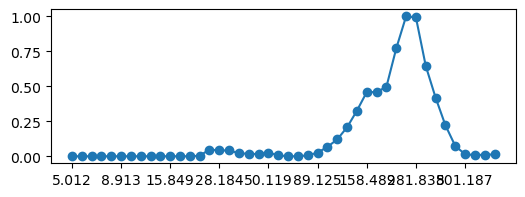

In [162]:
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(bin_cols, df_norm.iloc[0,:].values, 'o-')
ax.set_xticks(bin_cols[::5])
plt.show()

For more information https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [175]:
def perform_clustering(df_normarlised, n_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters).fit(df_normarlised) #Compute k-means clustering.
    labels = kmeans.labels_
    centres = kmeans.cluster_centers_
    df_normarlised['clusters'] = kmeans.predict(df_normarlised) #Predict the closest cluster each sample in X belongs to.
    return df_normarlised

In [176]:
df_norm_clustered = perform_clustering(df_norm, n_clusters=5)

In [174]:
df_norm_clustered['clusters'].values

array([3, 3, 3, ..., 1, 1, 1])

In [177]:
df_norm_clustered.head(2)

,norm5.012,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,...,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,norm630.957,norm707.946,clusters
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-10 14:00:00,9.035668e-32,9.028350e-32,9.020105e-32,9.010813e-32,9.000338e-32,8.988523e-32,8.975198e-32,8.960157e-32,8.943178e-32,8.923997e-32,...,0.991352,0.644837,0.418756,0.221130,0.073787,0.014255,0.008561,0.011367,0.012960,4
2010-11-10 14:30:00,8.547977e-32,8.541067e-32,8.532916e-32,2.956000e-03,1.094256e-01,3.875901e-02,8.488142e-32,8.476577e-32,8.460657e-32,8.439621e-32,...,1.000000,0.916782,0.499011,0.196742,0.069014,0.026144,0.012921,0.006985,0.001986,4


In [178]:
df_median_clusters = df_norm_clustered.groupby('clusters').median()

Let's have a quick look at the clusters 

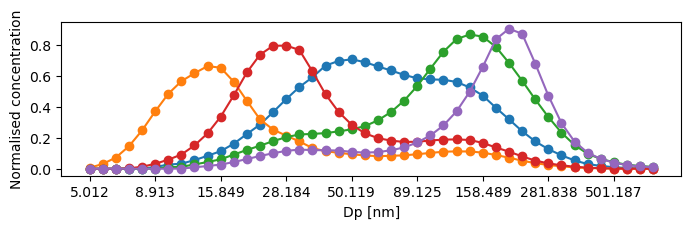

In [185]:
n_clusters=5

fig, ax = plt.subplots(figsize=(8,2))
for i in range(n_clusters):
    ax.plot(bin_cols, df_median_clusters.iloc[i,:].values, 'o-')
    ax.set_xticks(bin_cols[::5])
plt.xlabel('Dp [nm]')
plt.ylabel('Normalised concentration')
plt.show()